In [36]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

 
data = pd.read_csv('/Users/juanhuml/Desktop/spread_data.csv')
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split

data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

/Users/juanhuml/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/juanhuml/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [38]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 10)

In [39]:
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 17.491544


In [40]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=420)
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.060876,0.143482,21.516670,0.159444
1,19.799660,0.087221,20.719055,0.295670
2,18.717421,0.178429,20.079371,0.186268
3,17.675907,0.189308,19.398640,0.267426
4,16.885812,0.251436,18.956883,0.164197


In [41]:
print((cv_results["test-rmse-mean"]).tail(1))

38    15.403639
Name: test-rmse-mean, dtype: float64


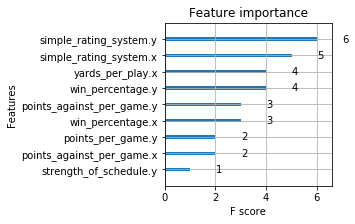

In [42]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [3, 3]
plt.show()

In [43]:
total_data = pd.read_csv('/Users/juanhuml/Desktop/wide_spread.csv')
X, y = total_data.iloc[:,:-1],total_data.iloc[:,-1]

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.20,
                max_depth = 2, alpha = 10, n_estimators = 9)
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

mae = mean_absolute_error(y_test, preds)
print("mae: %f" % (mae))
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="mae", as_pandas=True, seed=420)
#cv_results.head()
print((cv_results["test-mae-mean"]).tail(1))

mae: 15.759039
49    13.557505
Name: test-mae-mean, dtype: float64


/Users/juanhuml/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/juanhuml/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
